# LSTM과 GRU 레이어
* gradient의 소실 문제를 보완
* 장단기 메모리 알고리즘

## 데이터셋 로드

In [4]:
from tensorflow.keras.datasets import reuters 

In [5]:
num_words = 10000
(X_train, y_train), (X_val, y_val) = reuters.load_data(num_words = num_words)

print(X_train.shape)

print(X_val.shape)

2121728/2110848 [==============================] - 0s 0us/step
(8982,)
(2246,)


## 데이터 전처리 확인

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
max_len = 500

In [8]:
pad_X_train = pad_sequences(X_train, maxlen = max_len)
pad_X_val = pad_sequences(X_val, maxlen = max_len)

print(len(pad_X_train[0]))

500


In [9]:
pad_X_train

array([[  0,   0,   0, ...,  15,  17,  12],
       [  0,   0,   0, ..., 505,  17,  12],
       [  0,   0,   0, ...,  11,  17,  12],
       ...,
       [  0,   0,   0, ..., 407,  17,  12],
       [  0,   0,   0, ..., 364,  17,  12],
       [  0,   0,   0, ..., 113,  17,  12]], dtype=int32)

## 모델 구성
* LSTM레이어도  SimpleRNN과 같이 return_sequences 인자 사용가능

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

In [11]:
model =Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 64))
model.add(LSTM(64, return_sequences=  True))
model.add(LSTM(32))
model.add(Dense(46, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics= ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 lstm (LSTM)                 (None, None, 64)          33024     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 46)                1518      
                                                                 
Total params: 686,958
Trainable params: 686,958
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [12]:
history = model.fit(pad_X_train , y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
57/57 [==============================] - 9s 67ms/step - loss: 2.8852 - acc: 0.3299 - val_loss: 2.4372 - val_acc: 0.3450
Epoch 2/10
57/57 [==============================] - 3s 56ms/step - loss: 2.4163 - acc: 0.3534 - val_loss: 2.4079 - val_acc: 0.3450
Epoch 3/10
57/57 [==============================] - 3s 57ms/step - loss: 2.4068 - acc: 0.3534 - val_loss: 2.4057 - val_acc: 0.3450
Epoch 4/10
57/57 [==============================] - 3s 56ms/step - loss: 2.4059 - acc: 0.3534 - val_loss: 2.4060 - val_acc: 0.3450
Epoch 5/10
57/57 [==============================] - 3s 56ms/step - loss: 2.4050 - acc: 0.3534 - val_loss: 2.4065 - val_acc: 0.3450
Epoch 6/10
57/57 [==============================] - 3s 57ms/step - loss: 2.4048 - acc: 0.3534 - val_loss: 2.4068 - val_acc: 0.3450
Epoch 7/10
57/57 [==============================] - 3s 56ms/step - loss: 2.4050 - acc: 0.3534 - val_loss: 2.4067 - val_acc: 0.3450
Epoch 8/10
57/57 [==============================] - 3s 56ms/step - loss: 2.4026 - a

## 시각화

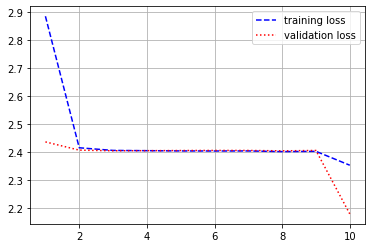

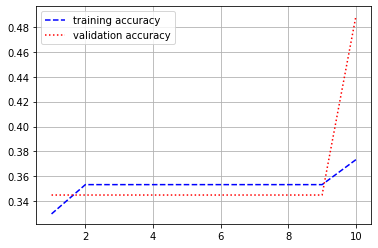

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training accuracy')
plt.plot(epochs, val_acc, 'r:', label = 'validation accuracy')
plt.grid()
plt.legend()

plt.show()

## 모델 평가

In [14]:
model.evaluate(pad_X_val, y_val)

71/71 [==============================] - 1s 17ms/step - loss: 2.1857 - acc: 0.4978


[2.18574595451355, 0.49777382612228394]

# Cosine 함수를 이용한 순환 신경망

In [15]:
import numpy as np
np.random.seed(111)

time = np.arange(30*12+1)
month_time = (time%30) / 30
time_series = 20* np.where(month_time < 0.5,
                           np.cos(2 * np.pi * month_time),
                           np.cos(2*np.pi*month_time) + np.random.random(361))

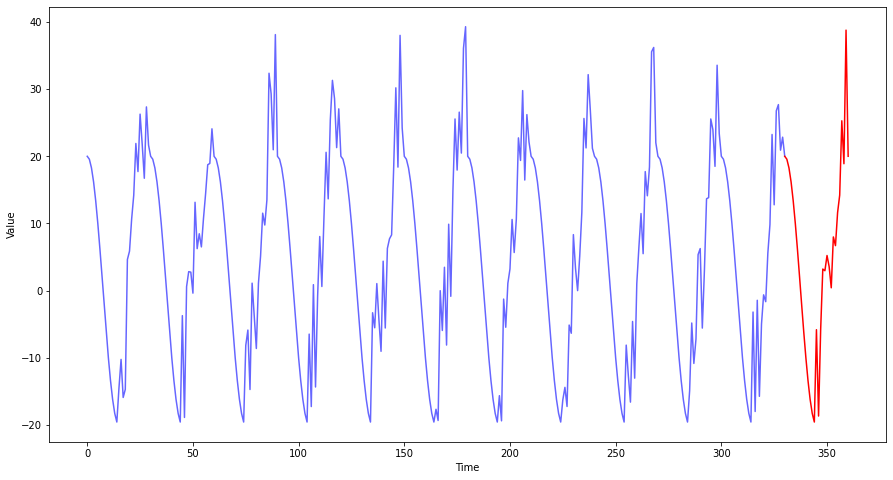

In [16]:
plt.figure(figsize = (15,8))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30 *11+1),
         time_series[:30*11+1],
         color = 'blue', alpha = 0.6, label = 'Train Data')

plt.plot(np.arange(30*11, 30 *12+1),
         time_series[30*11:],
         color = 'red',label = 'Test Data')

## 데이터 전처리

In [17]:
def make_data(time_series, n):
  x_train_full, y_train_full = list(), list()

  for i in range(len(time_series)):
    x = time_series[i:(i+n)]
    if (i+n) < len(time_series):
      x_train_full.append(x)
      y_train_full.append(time_series[i+n])
    else:
      break
  x_train_full, y_train_full = np.array(x_train_full), np.array(y_train_full)
  return x_train_full, y_train_full

In [18]:
n = 10
x_train_full, y_train_full = make_data(time_series, n)

In [19]:
x_train_full = x_train_full.reshape(-1,n, 1)
y_train_full = y_train_full.reshape(-1, 1)

## 테스트 데이터 셋 생성

In [20]:
x_train = x_train_full[:30*11]
y_train = y_train_full[:30*11]

x_test = x_train_full[30*11:]
y_test = y_train_full[30*11:]

In [21]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(330, 10, 1) (330, 1)
(21, 10, 1) (21, 1)


## 데이터 확인

In [22]:
sample_series = np.arange(100)
a, b = make_data(sample_series, 10)

print(a[0])
print(b[0])

[0 1 2 3 4 5 6 7 8 9]
10


## 모델 구성

In [23]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential 

In [24]:
def build_model(n):
  model = Sequential()
  model.add(SimpleRNN(units= 32, activation = 'tanh', input_shape = (n ,1)))
  model.add(Dense(1))
  model.compile(optimizer = 'adam', loss = 'mse')

  return model 

In [25]:
model = build_model(10)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [26]:
model.fit(x_train, y_train, epochs = 200,batch_size= 12)

Epoch 1/200
28/28 [==============================] - 1s 12ms/step - loss: 232.7133
Epoch 2/200
28/28 [==============================] - 0s 7ms/step - loss: 190.4601
Epoch 3/200
28/28 [==============================] - 0s 7ms/step - loss: 161.9663
Epoch 4/200
28/28 [==============================] - 0s 7ms/step - loss: 143.4865
Epoch 5/200
28/28 [==============================] - 0s 7ms/step - loss: 125.8221
Epoch 6/200
28/28 [==============================] - 0s 7ms/step - loss: 113.6244
Epoch 7/200
28/28 [==============================] - 0s 7ms/step - loss: 104.0121
Epoch 8/200
28/28 [==============================] - 0s 7ms/step - loss: 94.9897
Epoch 9/200
28/28 [==============================] - 0s 7ms/step - loss: 88.2348
Epoch 10/200
28/28 [==============================] - 0s 7ms/step - loss: 82.4136
Epoch 11/200
28/28 [==============================] - 0s 7ms/step - loss: 77.2736
Epoch 12/200
28/28 [==============================] - 0s 7ms/step - loss: 72.8043
Epoch 13/200
28/2

## 예측값 그려보기

In [27]:
prediction = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(prediction))

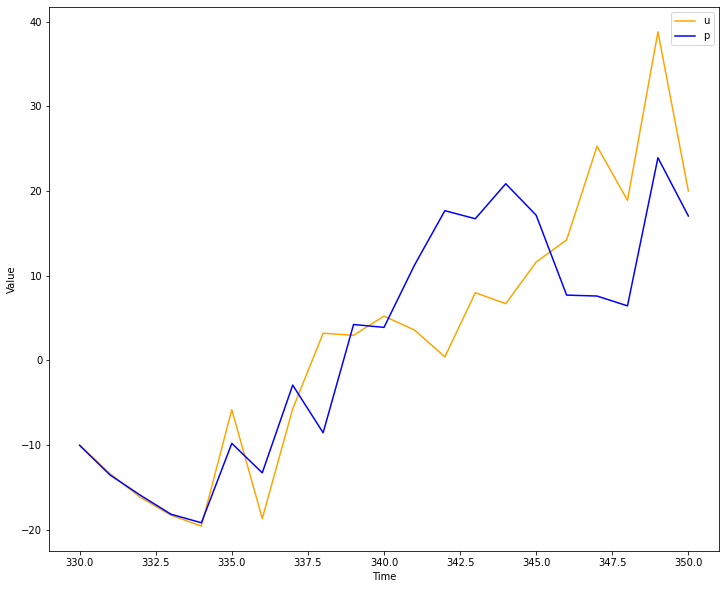

In [28]:
plt.figure(figsize = (12, 10))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color = 'orange', label = 'Ground Truth')
plt.plot(pred_range, prediction.flatten(), color = 'blue', label = 'Prediction')
plt.legend('upper right')

# 모델의 재구성
* LSTM


In [29]:
from tensorflow.keras.layers import LSTM

In [30]:
def build_model2(n):
  model = Sequential()

  model.add(LSTM(units = 64, return_sequences = True, input_shape = (n,1)))
  model.add(LSTM(32))
  model.add(Dense(1))

  model.compile(optimizer = 'adam',
                loss = 'mse')
  
  return model

In [31]:
model_2 = build_model2(10)
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 64)            16896     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


## 모델 재학습 및 예측값 그리기

In [ ]:
model_2.fit(x_train, y_train,
            epochs = 100, batch_size = 32)

## 예측값 그려보기

In [33]:
prediction_2 = model_2.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(prediction))

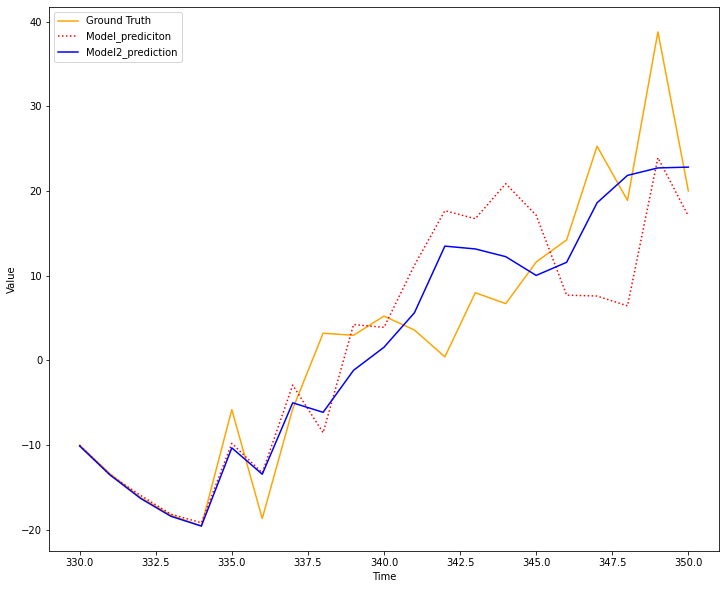

In [34]:
plt.figure(figsize = (12, 10))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color = 'orange', label = 'Ground Truth')
plt.plot(pred_range, prediction.flatten(), 'r:', label = 'Model_prediciton')
plt.plot(pred_range, prediction_2.flatten(), color = 'blue', label = 'Model2_prediction')
plt.legend()

# 모델의 재구성
* GRU
* LSTM보다 더 쉬운 구조

In [35]:
from tensorflow.keras.layers import GRU

In [36]:
def build_model3(n):
  model = Sequential()

  model.add(GRU(units = 64, return_sequences = True, input_shape = (n,1)))
  model.add(GRU(32))
  model.add(Dense(1))

  model.compile(optimizer = 'adam',
                loss = 'mse')
  
  return model

In [37]:
model_3 = build_model3(10)
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 64)            12864     
                                                                 
 gru_1 (GRU)                 (None, 32)                9408      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 22,305
Trainable params: 22,305
Non-trainable params: 0
_________________________________________________________________


## 모델 재학습 및 예측값 그리기

In [38]:
model_3.fit(x_train, y_train,
            epochs = 200, batch_size = 32)

Epoch 1/200
11/11 [==============================] - 3s 4ms/step - loss: 205.5418
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 155.5556
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 126.0797
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 108.1717
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 96.2333
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 88.3202
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 82.3446
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 77.7327
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 73.8313
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss: 70.8598
Epoch 11/200
11/11 [==============================] - 0s 4ms/step - loss: 67.5084
Epoch 12/200
11/11 [==============================] - 0s 4ms/step - loss: 64.4950
Epoch 13/200
11/11 [=

## 예측값 그려보기

In [39]:
prediction_3 = model_3.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(prediction))

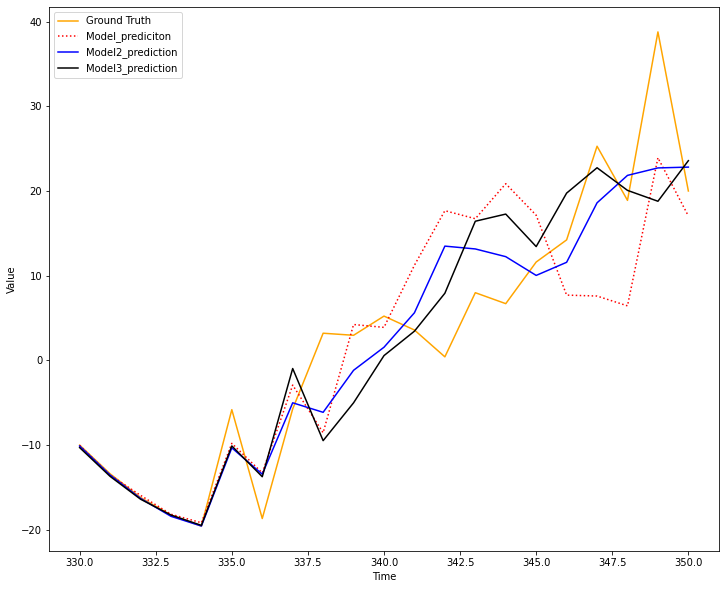

In [41]:
plt.figure(figsize = (12, 10))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color = 'orange', label = 'Ground Truth')
plt.plot(pred_range, prediction.flatten(), 'r:', label = 'Model_prediciton')
plt.plot(pred_range, prediction_2.flatten(), color = 'blue', label = 'Model2_prediction')
plt.plot(pred_range, prediction_3.flatten(), color = 'black', label = 'Model3_prediction')
plt.legend()